## 분석의 목적 :각나라의 디즈니랜드의 평가가 어떤지 알아보고 부정의 리뷰를 통해 고객들의 니즈가 무엇인지 파악하여 개선방법을 찾아보자

In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install afinn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [5]:
# 언어모델 다운받기
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Python37\python.exe -m pip install --upgrade pip' command.


In [25]:
!pip install wordcloud

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [9]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [209]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import spacy
import re
import seaborn as sns
import matplotlib.pyplot as plt

from spacy.tokenizer import Tokenizer
from nltk.corpus import stopwords 
from textblob import TextBlob
from wordcloud import WordCloud


In [176]:
# 데이터 로드
df = pd.read_csv('Raw_data.csv',encoding='latin1')
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [177]:
# from gensim.summarization.summarizer import summarize
# text= df['Review_Text'][0]
# summarize(text, word_count =20)

In [178]:
# df['Review_Text'][0]

In [179]:
# df['Review_Text'][2].split('""')

In [180]:
# for i in range(len(df['Review_Text'])):
#     if len(df['Review_Text'][i]) ==1:
#         print(df['Review_Text'][i])
#     else:
#         summarize(df['Review_Text'][i], word_count = 20)

In [181]:
# 데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [182]:
# 결측값 확인
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [183]:
# 필요없는 컬럼 제거
df = df.drop(columns = ['Review_ID', 'Year_Month'])
df

,Rating,Reviewer_Location,Review_Text,Branch
0,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...
42651,5,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,5,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,5,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,4,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [184]:
# 국가의 종류 확인
df['Branch'].unique()

array(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'],
      dtype=object)

In [189]:
# 리뷰 컬럼 확인
df['Review_Text']

0        If you've ever been to Disneyland anywhere you...
1        Its been a while since d last time we visit HK...
2        Thanks God it wasn   t too hot or too humid wh...
3        HK Disneyland is a great compact park. Unfortu...
4        the location is not in the city, took around 1...
                               ...                        
42651    i went to disneyland paris in july 03 and thou...
42652    2 adults and 1 child of 11 visited Disneyland ...
42653    My eleven year old daughter and myself went to...
42654    This hotel, part of the Disneyland Paris compl...
42655    I went to the Disneyparis resort, in 1996, wit...
Name: Review_Text, Length: 42656, dtype: object

In [186]:
nlp = spacy.load("en_core_web_sm")

tokenizer = Tokenizer(nlp.vocab)

In [10]:
# 해당코드는 if절이 걸리지 않았음 오류코드

# # 토큰화를 위한 파이프라인 구성
 
# tokens = []
# stop_words = stopwords.words('english')

# for doc in tokenizer.pipe(df['Review_Text']):
#     if doc not in stop_words:
#         doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
#         tokens.append(doc_tokens)
    
# df['Review_Text'] = tokens[:]
# df['Review_Text'].head()

불용어 제거를 위해 참고한 링크 : <https://lemontia.tistory.com/802>

In [194]:
# 토큰화를 위한 파이프라인 구성
 
tokens = []
stop_words = stopwords.words('english')

for doc in tokenizer.pipe(df['Review_Text']):
   
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc if re.sub(r"[^a-z0-9]", "",token.text.lower()) not in stop_words]
    tokens.append(doc_tokens)
    
df['Review_Text'] = tokens[:]
df['Review_Text'].head()

0    [youve, ever, disneyland, anywhere, youll, fin...
1    [since, last, time, visit, hk, disneyland, , y...
2    [thanks, god, , hot, humid, visiting, park, , ...
3    [hk, disneyland, great, compact, park, unfortu...
4    [location, city, took, around, 1, hour, kowlon...
Name: Review_Text, dtype: object

In [195]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

df['Polarity'] = df['Review_Text'].apply(lambda x: getPolarity(' '.join(x))) # join함수 를 통해 리스트를 문자열로 바꿔서 에러해결
df

# 여기서 걸린 에러 해결 
# <https://textblob.readthedocs.io/en/dev/quickstart.html>
# <https://stackoverflow.com/questions/62611786/textblob-tweets-typeerror-the-text-argument-passed-to-init-text-must>

,Rating,Reviewer_Location,Review_Text,Branch,Polarity
0,4,Australia,"[youve, ever, disneyland, anywhere, youll, fin...",Disneyland_HongKong,0.226852
1,4,Philippines,"[since, last, time, visit, hk, disneyland, , y...",Disneyland_HongKong,0.209524
2,4,United Arab Emirates,"[thanks, god, , hot, humid, visiting, park, , ...",Disneyland_HongKong,0.226548
3,4,Australia,"[hk, disneyland, great, compact, park, unfortu...",Disneyland_HongKong,0.222222
4,4,United Kingdom,"[location, city, took, around, 1, hour, kowlon...",Disneyland_HongKong,0.266667
...,...,...,...,...,...
42651,5,United Kingdom,"[went, disneyland, paris, july, 03, thought, b...",Disneyland_Paris,0.252778
42652,5,Canada,"[2, adults, 1, child, 11, visited, disneyland,...",Disneyland_Paris,0.178333
42653,5,South Africa,"[eleven, year, old, daughter, went, visit, son...",Disneyland_Paris,0.212500
42654,4,United States,"[hotel, part, disneyland, paris, complex, wond...",Disneyland_Paris,0.253480


In [196]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Rating,Reviewer_Location,Review_Text,Branch,Polarity,Analysis
0,4,Australia,"[youve, ever, disneyland, anywhere, youll, fin...",Disneyland_HongKong,0.226852,Positive
1,4,Philippines,"[since, last, time, visit, hk, disneyland, , y...",Disneyland_HongKong,0.209524,Positive
2,4,United Arab Emirates,"[thanks, god, , hot, humid, visiting, park, , ...",Disneyland_HongKong,0.226548,Positive
3,4,Australia,"[hk, disneyland, great, compact, park, unfortu...",Disneyland_HongKong,0.222222,Positive
4,4,United Kingdom,"[location, city, took, around, 1, hour, kowlon...",Disneyland_HongKong,0.266667,Positive
...,...,...,...,...,...,...
42651,5,United Kingdom,"[went, disneyland, paris, july, 03, thought, b...",Disneyland_Paris,0.252778,Positive
42652,5,Canada,"[2, adults, 1, child, 11, visited, disneyland,...",Disneyland_Paris,0.178333,Positive
42653,5,South Africa,"[eleven, year, old, daughter, went, visit, son...",Disneyland_Paris,0.212500,Positive
42654,4,United States,"[hotel, part, disneyland, paris, complex, wond...",Disneyland_Paris,0.253480,Positive


In [197]:
df['Analysis'].value_counts()

Positive    38419
Negative     3813
Neutral       424
Name: Analysis, dtype: int64

In [198]:
# 디즈니랜드 국가별 데이터 프레임 생성
df_HongKong = df[df['Branch']=='Disneyland_HongKong']
df_California = df[df['Branch']=='Disneyland_California']
df_Paris = df[df['Branch']=='Disneyland_Paris']

In [199]:
print('홍콩 데이터 길이: ',len(df_HongKong['Analysis']))
print('캘리포니아 데이터 길이: ',len(df_California['Analysis']))
print('파리 데이터 길이: ',len(df_Paris['Analysis']))

홍콩 데이터 길이:  9620
캘리포니아 데이터 길이:  19406
파리 데이터 길이:  13630


In [200]:
print(df_HongKong['Analysis'].value_counts())
print('------------')
print(df_California['Analysis'].value_counts())
print('------------')
print(df_Paris['Analysis'].value_counts())

Positive    8757
Negative     768
Neutral       95
Name: Analysis, dtype: int64
------------
Positive    17632
Negative     1531
Neutral       243
Name: Analysis, dtype: int64
------------
Positive    12030
Negative     1514
Neutral        86
Name: Analysis, dtype: int64


Text(0.5, 1.0, 'Paris Sentiment Analysis')

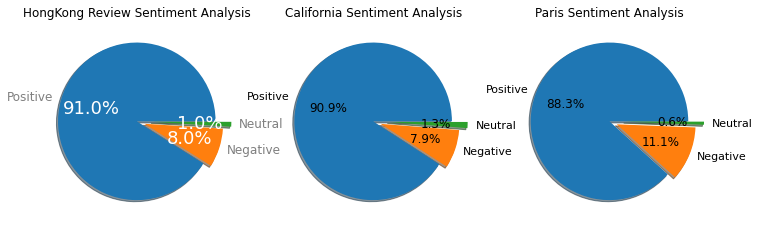

In [218]:
sns.set_context('notebook')

fig, ax = plt.subplots(1,3,figsize = (12,5))

sizes = [8757/len(df_HongKong['Analysis']), 768/len(df_HongKong['Analysis']), 95/len(df_HongKong['Analysis'])]
labels = ['Positive', 'Negative', 'Neutral']

pathes, texts, autotexts = ax[0].pie(sizes, 
                                    labels = labels,
                                    autopct = '%1.1f%%',
                                    shadow = True,
                                    explode = (0,0.1,0.2))

for t in texts:
  t.set_fontsize(12)
  t.set_color('gray')

for t in autotexts:
  t.set_color('white')
  t.set_fontsize(18)
    
    
ax[0].set_title('HongKong Review Sentiment Analysis')







sizes2 = [17632/len(df_California['Analysis']), 1531/len(df_California['Analysis']), 243/len(df_California['Analysis'])]
labels2 = ['Positive', 'Negative', 'Neutral']

pathes, texts, autotexts = ax[1].pie(sizes2, 
                                    labels = labels2,
                                    autopct = '%1.1f%%',
                                    shadow = True,
                                    explode = (0,0.1,0.2))

ax[1].set_title('California Sentiment Analysis')




sizes3 = [12030/len(df_Paris['Analysis']), 1514/len(df_Paris['Analysis']), 86/len(df_Paris['Analysis'])]
labels3 = ['Positive', 'Negative', 'Neutral']

pathes, texts, autotexts = ax[2].pie(sizes3, 
                                    labels = labels3,
                                    autopct = '%1.1f%%',
                                    shadow = True,
                                    explode = (0,0.1,0.2))

ax[2].set_title('Paris Sentiment Analysis')

In [219]:
N_HK = df[(df['Branch']=='Disneyland_HongKong') & (df['Analysis']=='Negative')]
N_HK

,Rating,Reviewer_Location,Review_Text,Branch,Polarity,Analysis
5,3,Singapore,"[disney, world, disneyland, anaheim, tokyo, di...",Disneyland_HongKong,-0.100000,Negative
8,2,Australia,"[feel, let, placethe, disneyland, train, fanta...",Disneyland_HongKong,-0.064286,Negative
10,5,United States,"[disneyland, never, cease, amaze, ive, disneyl...",Disneyland_HongKong,-0.050000,Negative
15,3,United Kingdom,"[brought, tickets, left, got, 2, days, less, p...",Disneyland_HongKong,-0.052500,Negative
17,3,United Kingdom,"[around, , 60, per, person, want, eat, drink, ...",Disneyland_HongKong,-0.076871,Negative
...,...,...,...,...,...,...
9592,3,United Kingdom,"[hong, kong, 5, weeks, disney, fans, disney, p...",Disneyland_HongKong,-0.003630,Negative
9604,1,United States,"[hk, disney, boring, , go, ocean, park, , go, ...",Disneyland_HongKong,-1.000000,Negative
9608,1,Singapore,"[waste, time, money, think, planning, bringing...",Disneyland_HongKong,-0.125036,Negative
9611,4,United States,"[spent, christmas, eva, park, 1130am, 830pm, ,...",Disneyland_HongKong,-0.466667,Negative


In [220]:
N_HK['Review_Text']

5       [disney, world, disneyland, anaheim, tokyo, di...
8       [feel, let, placethe, disneyland, train, fanta...
10      [disneyland, never, cease, amaze, ive, disneyl...
15      [brought, tickets, left, got, 2, days, less, p...
17      [around, , 60, per, person, want, eat, drink, ...
                              ...                        
9592    [hong, kong, 5, weeks, disney, fans, disney, p...
9604    [hk, disney, boring, , go, ocean, park, , go, ...
9608    [waste, time, money, think, planning, bringing...
9611    [spent, christmas, eva, park, 1130am, 830pm, ,...
9615    [husband, took, 2, kids, worst, experience, li...
Name: Review_Text, Length: 768, dtype: object

In [221]:
for i in N_HK['Review_Text']:
    print(i)

['disney', 'world', 'disneyland', 'anaheim', 'tokyo', 'disneyland', 'feel', 'disneyland', 'hong', 'kong', 'really', 'small', 'called', 'disneyland', 'way', 'rides', 'attractions', 'souvenirs', 'food', 'even', 'entrance', 'tickets', 'slightly', 'expensive', 'disneyland', 'well', 'basically', 'park', 'good', 'small', 'children', 'people', 'never', 'disney', 'food', 'choices', 'acceptable', 'mostly', 'fast', 'food', 'expensive', 'bottled', 'water', 'however', 'expensive', 'water', 'fountains', 'around', 'refill', 'water', 'bottles', 'parade', 'pretty', 'good', 'crowded', 'problem', 'problem', 'people', 'rude', 'pushing', 'shoving', 'cutting', 'lines', 'rides', 'gift', 'shops', 'food', 'stands', 'much', 'take', 'forget', 'trying', 'see', 'one', 'shows', 'free', 'seats', 'dont', 'see', 'disney', 'let', 'happen', 'far', 'worst', 'managed', 'disney', 'property']
['feel', 'let', 'placethe', 'disneyland', 'train', 'fantastic', 'get', 'past', 'stationbad', 'signage', 'terrible', 'staff', 'want',

In [222]:
from collections import Counter
word_counts = Counter()
N_HK['Review_Text'].apply(lambda x: word_counts.update(x))
count = word_counts.most_common()
count

[('', 876),
 ('disneyland', 537),
 ('disney', 471),
 ('park', 457),
 ('rides', 439),
 ('day', 292),
 ('small', 273),
 ('time', 259),
 ('food', 258),
 ('one', 226),
 ('go', 224),
 ('kids', 220),
 ('hong', 204),
 ('kong', 200),
 ('expensive', 176),
 ('place', 172),
 ('visit', 171),
 ('would', 166),
 ('like', 158),
 ('hk', 158),
 ('went', 155),
 ('ride', 143),
 ('parade', 140),
 ('get', 137),
 ('queue', 132),
 ('dont', 130),
 ('long', 130),
 ('people', 122),
 ('experience', 122),
 ('even', 121),
 ('bad', 121),
 ('us', 118),
 ('disappointed', 117),
 ('see', 115),
 ('staff', 115),
 ('around', 111),
 ('really', 108),
 ('much', 104),
 ('world', 103),
 ('children', 101),
 ('2', 100),
 ('also', 99),
 ('visited', 98),
 ('little', 97),
 ('queues', 95),
 ('parks', 94),
 ('fireworks', 90),
 ('attractions', 88),
 ('line', 87),
 ('still', 85),
 ('well', 84),
 ('quite', 83),
 ('wait', 81),
 ('show', 81),
 ('minutes', 78),
 ('compared', 78),
 ('crowded', 77),
 ('take', 76),
 ('waiting', 75),
 ('charact

In [223]:
word_counts_df = pd.DataFrame(word_counts.most_common(50))
word_counts_df.columns = ['word', 'counts']

<AxesSubplot:xlabel='counts', ylabel='word'>

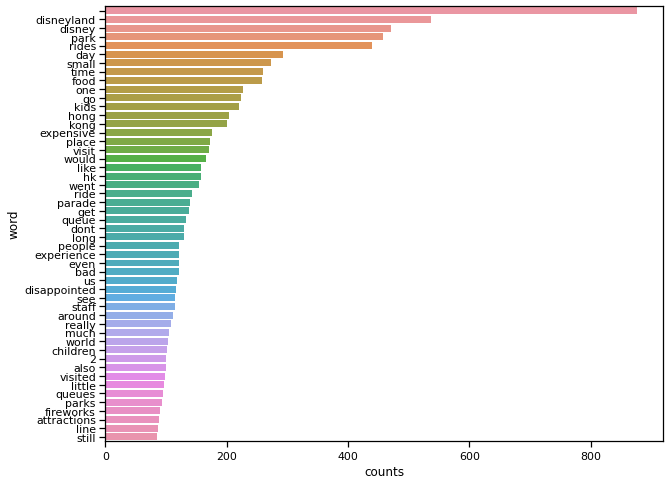

In [224]:
plt.figure(figsize =(10,8))
sns.barplot(x = 'counts', y = 'word', data = word_counts_df)

(-0.5, 799.5, 399.5, -0.5)

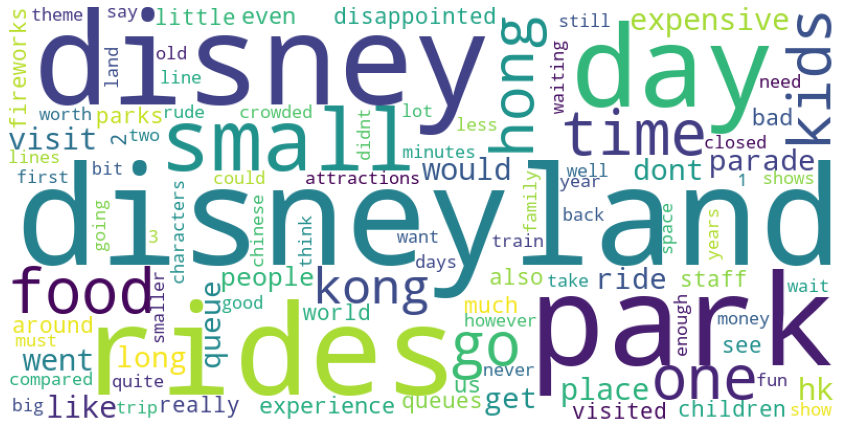

In [225]:
# 시각화 
wordcloud = WordCloud(background_color = 'white',
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400).generate_from_frequencies(word_counts)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')

In [226]:
N_C = df[(df['Branch']=='Disneyland_California') & (df['Analysis']=='Negative')]
N_C

,Rating,Reviewer_Location,Review_Text,Branch,Polarity,Analysis
9636,1,United States,"[, disneyland, several, times, past, 3, decade...",Disneyland_California,-0.068937,Negative
9642,2,United Kingdom,"[partner, paid, 149, tickets, park, partner, w...",Disneyland_California,-0.010714,Negative
9687,1,Australia,"[really, disappointed, disneylandold, tired, c...",Disneyland_California,-0.037778,Negative
9701,1,United States,"[came, anniversary, trip, rides, extremely, lo...",Disneyland_California,-0.202747,Negative
9703,5,Canada,"[truly, happiest, place, earth, pay, money, ge...",Disneyland_California,-0.023438,Negative
...,...,...,...,...,...,...
28909,3,United States,"[first, visit, disneyland, since, 7, years, ol...",Disneyland_California,-0.015317,Negative
28957,4,United States,"[would, like, clarify, disneyland, older, , di...",Disneyland_California,-0.093889,Negative
28960,1,United States,"[august, 4, 2005hello, single, mom, widow, one...",Disneyland_California,-0.037338,Negative
28962,1,United States,"[disneyland, everybody, factwe, knew, school, ...",Disneyland_California,-0.088942,Negative


In [227]:
from collections import Counter
word_counts = Counter()
N_C['Review_Text'].apply(lambda x: word_counts.update(x))
count = word_counts.most_common()
count

[('', 1955),
 ('park', 1247),
 ('disneyland', 1019),
 ('disney', 883),
 ('rides', 864),
 ('day', 795),
 ('get', 748),
 ('time', 714),
 ('go', 612),
 ('people', 584),
 ('ride', 578),
 ('one', 501),
 ('line', 463),
 ('lines', 447),
 ('place', 423),
 ('long', 414),
 ('would', 412),
 ('wait', 411),
 ('like', 378),
 ('went', 360),
 ('food', 351),
 ('expensive', 341),
 ('kids', 341),
 ('back', 320),
 ('even', 319),
 ('crowded', 312),
 ('times', 296),
 ('visit', 290),
 ('pass', 289),
 ('2', 288),
 ('see', 286),
 ('disappointed', 285),
 ('us', 282),
 ('could', 254),
 ('dont', 254),
 ('closed', 253),
 ('crowds', 253),
 ('way', 252),
 ('much', 248),
 ('going', 248),
 ('never', 246),
 ('world', 243),
 ('really', 242),
 ('money', 240),
 ('got', 240),
 ('minutes', 238),
 ('year', 238),
 ('around', 226),
 ('fast', 225),
 ('little', 225),
 ('hours', 224),
 ('experience', 224),
 ('many', 220),
 ('family', 218),
 ('years', 217),
 ('california', 209),
 ('bad', 209),
 ('3', 207),
 ('parade', 206),
 ('als

In [228]:
word_counts_df2 = pd.DataFrame(word_counts.most_common(50))
word_counts_df2.columns = ['word', 'counts']

<AxesSubplot:xlabel='counts', ylabel='word'>

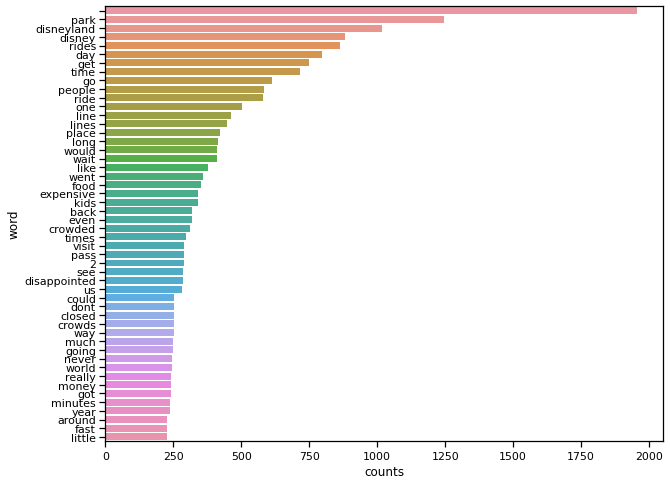

In [229]:
plt.figure(figsize =(10,8))
sns.barplot(x = 'counts', y = 'word', data = word_counts_df2)

(-0.5, 799.5, 399.5, -0.5)

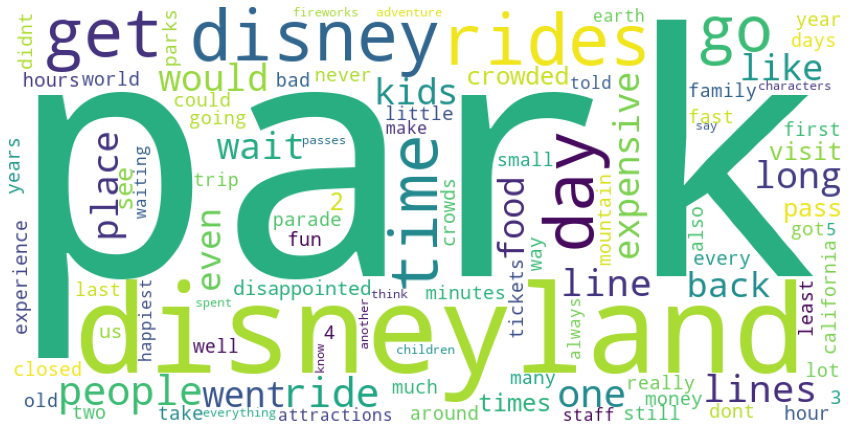

In [232]:
# 시각화 
wordcloud = WordCloud(background_color = 'white',
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400).generate_from_frequencies(word_counts)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')

In [233]:
N_P = df[(df['Branch']=='Disneyland_Paris') & (df['Analysis']=='Negative')]
N_P

,Rating,Reviewer_Location,Review_Text,Branch,Polarity,Analysis
29034,2,Greece,"[booked, tickets, line, disneyland, something,...",Disneyland_Paris,-0.016304,Negative
29038,5,Malta,"[place, everyone, deserves, go, least, life, t...",Disneyland_Paris,-0.150000,Negative
29041,5,Saudi Arabia,"[twice, , grandson, never, give, grandsons, ne...",Disneyland_Paris,-0.216667,Negative
29050,5,Israel,"[traveled, december, day, bit, rainy, less, cr...",Disneyland_Paris,-0.191667,Negative
29053,1,United Kingdom,"[shame, park, carry, name, disney, build, plac...",Disneyland_Paris,-0.027778,Negative
...,...,...,...,...,...,...
42602,2,United Kingdom,"[expected, visited, 2, american, theme, parks,...",Disneyland_Paris,-0.107143,Negative
42633,2,United Kingdom,"[weve, come, back, couple, days, eurodisney, a...",Disneyland_Paris,-0.034722,Negative
42635,1,United States,"[spent, three, days, disneyland, paris, resort...",Disneyland_Paris,-0.065000,Negative
42636,2,Switzerland,"[parades, great, bathrooms, filthy, , could, d...",Disneyland_Paris,-0.097222,Negative


In [234]:
from collections import Counter
word_counts = Counter()
N_P['Review_Text'].apply(lambda x: word_counts.update(x))
count = word_counts.most_common()
count

[('', 2949),
 ('disney', 1597),
 ('park', 1590),
 ('rides', 1318),
 ('food', 828),
 ('day', 826),
 ('get', 785),
 ('time', 778),
 ('one', 758),
 ('would', 737),
 ('go', 731),
 ('disneyland', 721),
 ('paris', 673),
 ('staff', 613),
 ('ride', 602),
 ('people', 597),
 ('closed', 581),
 ('us', 511),
 ('queues', 499),
 ('expensive', 492),
 ('2', 488),
 ('even', 477),
 ('queue', 463),
 ('like', 458),
 ('children', 433),
 ('parks', 426),
 ('back', 413),
 ('went', 413),
 ('long', 405),
 ('around', 392),
 ('see', 387),
 ('kids', 382),
 ('minutes', 368),
 ('visit', 367),
 ('really', 366),
 ('wait', 364),
 ('money', 351),
 ('place', 345),
 ('characters', 340),
 ('3', 334),
 ('disappointed', 333),
 ('also', 331),
 ('could', 325),
 ('dont', 324),
 ('hour', 324),
 ('attractions', 308),
 ('year', 305),
 ('much', 301),
 ('times', 299),
 ('experience', 298),
 ('hotel', 295),
 ('days', 290),
 ('bad', 287),
 ('two', 287),
 ('hours', 285),
 ('never', 279),
 ('got', 275),
 ('fast', 274),
 ('waiting', 269),

In [235]:
word_counts_df3 = pd.DataFrame(word_counts.most_common(50))
word_counts_df3.columns = ['word', 'counts']

<AxesSubplot:xlabel='counts', ylabel='word'>

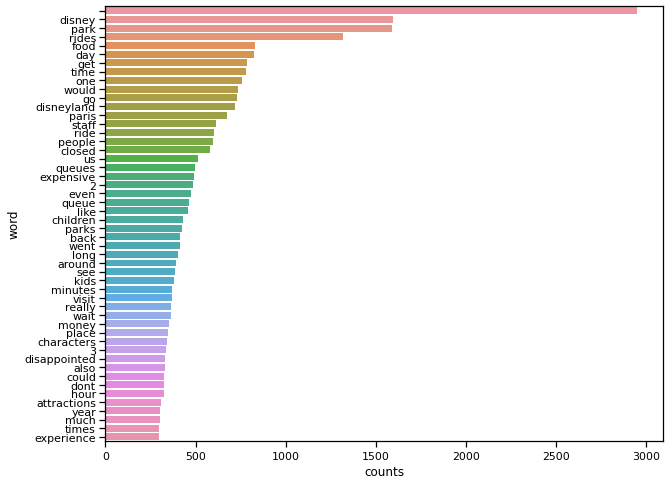

In [236]:
plt.figure(figsize =(10,8))
sns.barplot(x = 'counts', y = 'word', data = word_counts_df3)

(-0.5, 799.5, 399.5, -0.5)

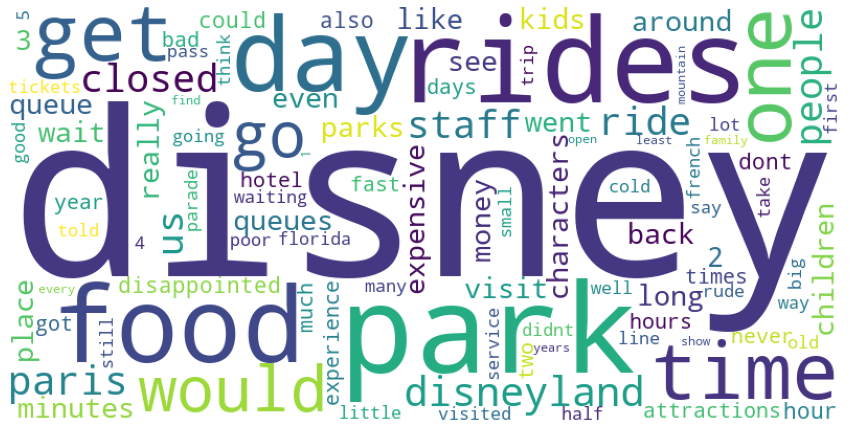

In [237]:
# 시각화 
wordcloud = WordCloud(background_color = 'white',
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400).generate_from_frequencies(word_counts)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')

In [241]:
N_HK['Reviewer_Location'].value_counts()

Australia               106
Singapore                98
United Kingdom           67
Philippines              64
India                    63
United States            61
Hong Kong                60
Malaysia                 43
Indonesia                31
Thailand                 26
Canada                   26
South Africa             14
China                    13
United Arab Emirates     10
New Zealand               9
Japan                     7
Taiwan                    5
Saudi Arabia              4
Italy                     4
Qatar                     3
Vietnam                   3
Bahrain                   3
Mauritius                 3
France                    3
Spain                     2
Sweden                    2
Egypt                     2
Ireland                   2
Norway                    2
Israel                    2
Macau                     2
Mexico                    2
Switzerland               2
Greece                    2
Netherlands               2
Germany             

In [242]:
N_C['Reviewer_Location'].value_counts()

United States               1025
Canada                       148
Australia                    147
United Kingdom                86
New Zealand                   21
India                          8
Philippines                    8
Mexico                         8
Singapore                      7
Germany                        6
Israel                         6
Netherlands                    5
Sweden                         4
Spain                          3
South Africa                   3
Thailand                       3
Guatemala                      3
Ireland                        3
Hong Kong                      3
Saudi Arabia                   2
Denmark                        2
Greece                         2
Argentina                      2
Switzerland                    2
Norway                         2
United Arab Emirates           2
Austria                        2
Japan                          2
France                         2
Russia                         1
Qatar     

In [244]:
N_P['Reviewer_Location'].value_counts().head(50)

United Kingdom          846
United States           149
Australia                82
Ireland                  46
Netherlands              30
France                   24
Canada                   23
India                    22
New Zealand              18
Belgium                  17
Switzerland              15
Singapore                15
Germany                  13
Greece                   13
Israel                   11
Portugal                 10
Denmark                  10
Spain                    10
South Africa              9
Malta                     9
Turkey                    9
United Arab Emirates      9
Sweden                    8
Saudi Arabia              7
Romania                   7
Cyprus                    7
Italy                     7
Egypt                     7
Lebanon                   6
Czechia                   6
Indonesia                 6
Norway                    5
Qatar                     4
Brazil                    4
Thailand                  3
Malaysia            